In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split  
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2score

In [3]:
train = pd.read_excel('new_data.xlsx', error_bad_lines=False)

train.Genre = train.Genre.str.replace(' ', '')
train.head(10)

,Name,Director,Total Vote,Year,IMDB score,MC Score,Genre,Column1,_1
0,The Shawshank Redemption,Frank Darabont,2318407,1994,9.3,80.0,Drama,NaN,NaN
1,The Dark Knight,Christopher Nolan,2280614,2008,9.0,84.0,Action,Crime,Drama
2,Inception,Christopher Nolan,2043823,2010,8.8,74.0,Action,Adventure,Sci-Fi
3,Fight Club,David Fincher,1836556,1999,8.8,66.0,Drama,NaN,NaN
4,Pulp Fiction,Quentin Tarantino,1808737,1994,8.9,94.0,Crime,Drama,NaN
5,Forrest Gump,Robert Zemeckis,1787786,1994,8.8,82.0,Drama,Romance,NaN
6,The Matrix,Lana Wachowski,1659036,1999,8.7,73.0,Action,Sci-Fi,NaN
7,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,1643836,2001,8.8,92.0,Action,Adventure,Drama
8,The Lord of the Rings: The Return of the King,Peter Jackson,1627500,2003,8.9,94.0,Action,Adventure,Drama
9,The Godfather,Francis Ford Coppola,1600967,1972,9.2,100.0,Crime,Drama,NaN


In [4]:
dircount = train.Director.value_counts()
print(dircount.head(20))

Steven Spielberg      21
Tim Burton            13
Ridley Scott          12
Michael Bay           11
Martin Scorsese       11
Christopher Nolan     10
David Fincher         10
Quentin Tarantino     10
Guy Ritchie            9
Bryan Singer           8
M. Night Shyamalan     8
Ron Howard             7
Peter Jackson          7
Clint Eastwood         7
Zack Snyder            7
Jon Favreau            7
Robert Zemeckis        7
Stanley Kubrick        6
David Yates            6
James Mangold          6
Name: Director, dtype: int64


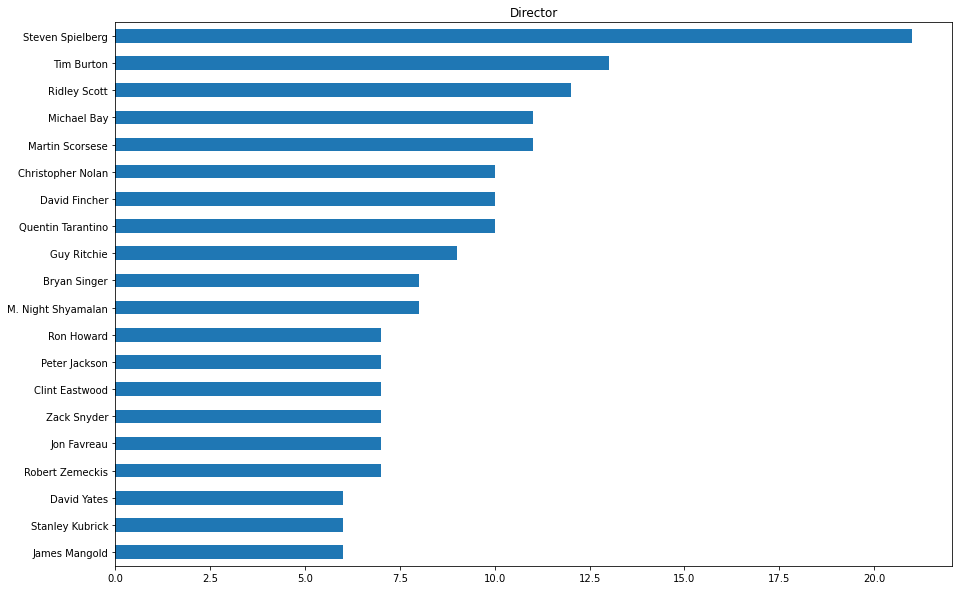

In [5]:
dircount.head(20).sort_values().plot(kind='barh', subplots=True, figsize=(15,10))
plt.savefig('fig1.jpeg', dpi = 150)

In [6]:
genrecount = train.Genre.value_counts()
print(genrecount)

Action       385
Comedy       151
Drama        148
Adventure     73
Animation     70
Crime         69
Biography     51
Horror        33
Mystery        8
Western        3
Fantasy        3
Sci-Fi         2
Family         2
Romance        1
Musical        1
Name: Genre, dtype: int64


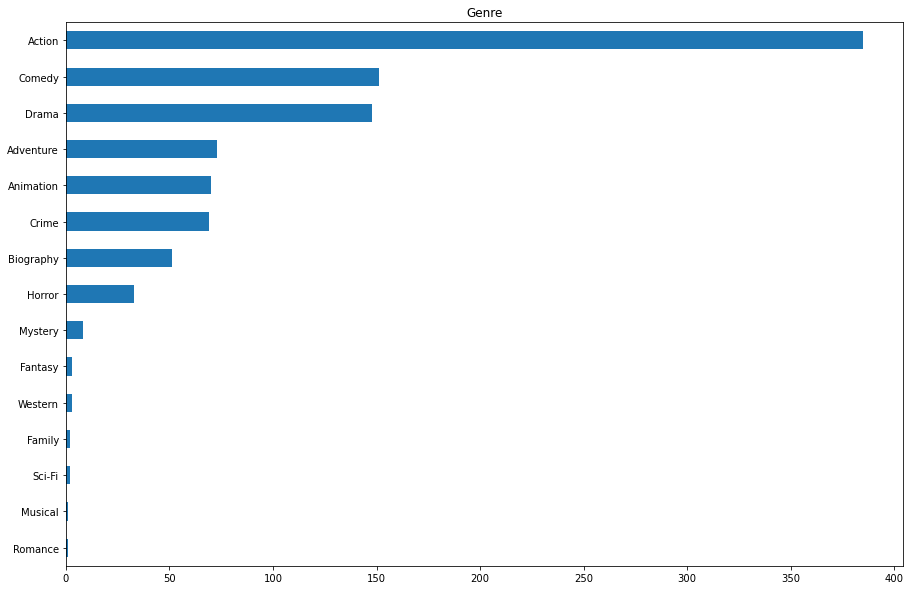

In [7]:
genrecount.sort_values().plot(kind='barh', subplots=True, figsize=(15,10))
plt.savefig('fig2.jpeg', dpi = 150)

In [8]:
test = train['Director'].value_counts().rename_axis('Director').reset_index(name='amount')
dirlist = []
for index, row in test.iterrows():
    dirlist.append(row['Director'])


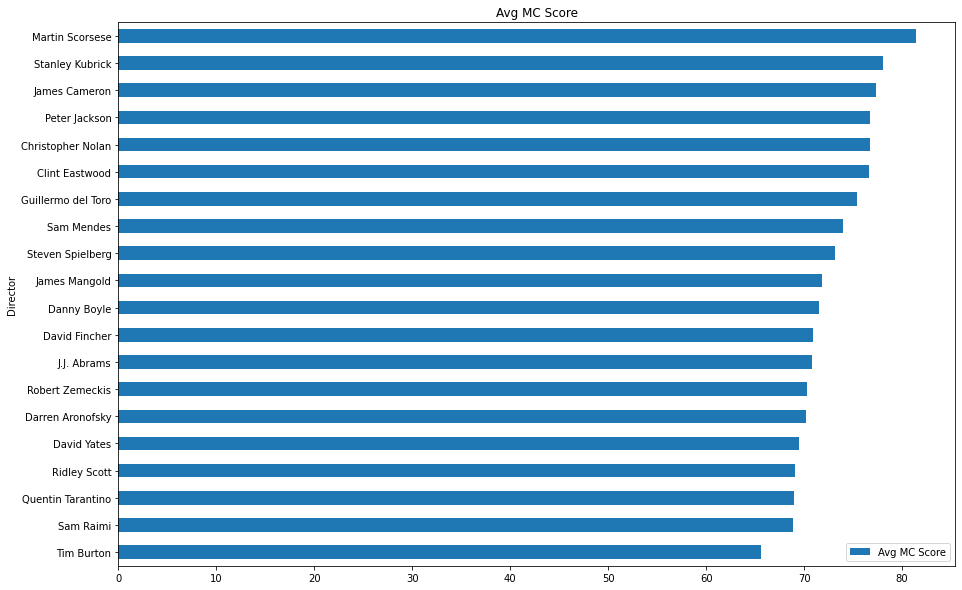

In [9]:
total = len(dirlist)
ccx = []
newdirlist = []
for g in range(total):
    x = train.loc[(train['Director'] == dirlist[g])]
    if len(x['Year']) > 5:
        newdirlist.append(dirlist[g])
        avgrat = x['MC Score'].sum() / len(x['Year'])
        ccx.append(avgrat)

d = {'Director':newdirlist,'Avg MC Score':ccx}
diravg = pd.DataFrame(d)

sort = diravg.sort_values(by=['Avg MC Score'], ascending=False)
sort.head(20).sort_values(by=['Avg MC Score']).plot(x = 'Director', y = 'Avg MC Score', kind='barh', subplots=True, figsize=(15,10))
plt.savefig('fig7.jpeg', dpi = 150)

In [10]:
test2 = train['Genre'].value_counts().rename_axis('Genre').reset_index(name='amount')
genlist = []
for index, row in test2.iterrows():
    genlist.append(row['Genre'])

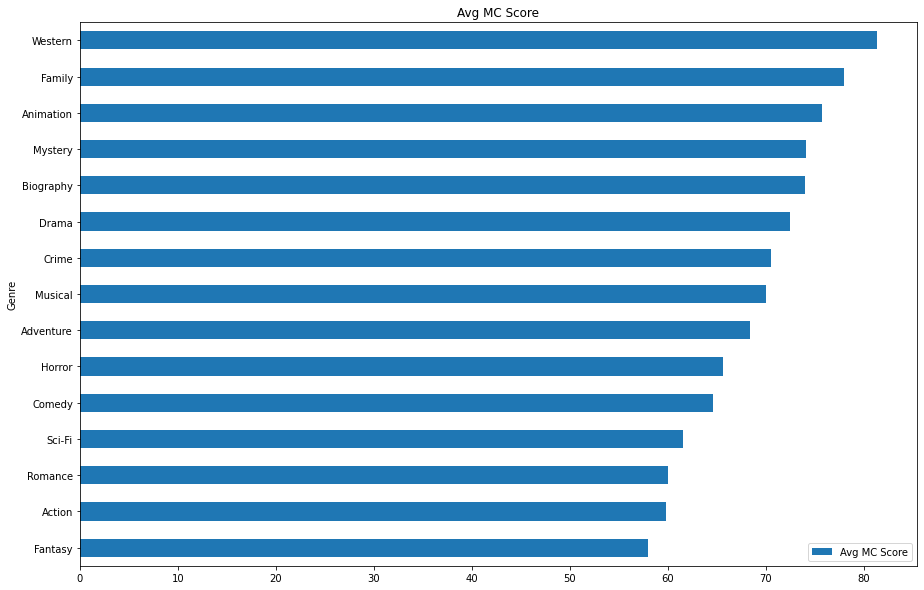

In [11]:
total2 = len(genlist)
ccx3 = []
newgenlist = []
for g in range(total2):
    x3 = train.loc[(train['Genre'] == genlist[g])]
    if len(x3['Year']) > 0:
        newgenlist.append(genlist[g])
        genavg = x3['MC Score'].sum() / len(x3['Year'])
        ccx3.append(genavg)

d3 = {'Genre':newgenlist,'Avg MC Score':ccx3}
genavg = pd.DataFrame(d3)

sort3 = genavg.sort_values(by=['Avg MC Score'], ascending=False)
sort3.head(20).sort_values(by=['Avg MC Score']).plot(x = 'Genre', y = 'Avg MC Score', kind='barh', subplots=True, figsize=(15,10))
plt.savefig('fig8.jpeg', dpi = 150)

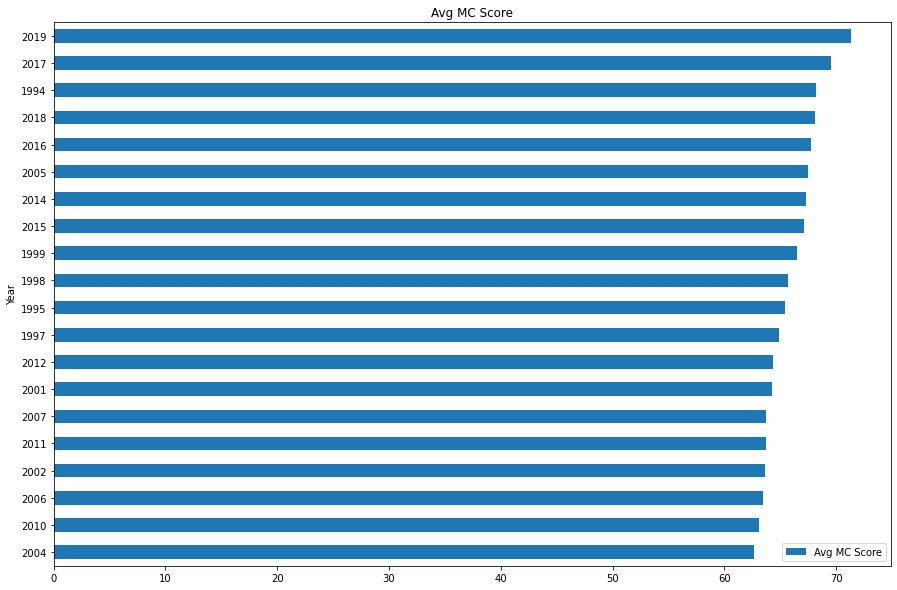

In [12]:
ccx2 = []
year = []
for i in range(1936, 2021):    
    x2 = train.loc[(train['Year'] == i)]
    if len(x2['Year']) > 10:
        year.append(i)
        if x2['IMDB score'].sum()!= 0|len(x2['Year'])!=0:
            yearavg = x2['MC Score'].sum() / len(x2['Year'])
            ccx2.append(yearavg)
        else:
            ccx2.append(0)
d2 = {'Year':year,'Avg MC Score':ccx2}
yearavg = pd.DataFrame(d2)

sort2 = yearavg.sort_values(by=['Avg MC Score'], ascending=False)
sort2.head(20).sort_values(by=['Avg MC Score']).plot(x = 'Year', y = 'Avg MC Score', kind='barh', subplots=True, figsize=(15,10))
plt.savefig('fig9.jpeg', dpi = 150)

In [13]:
yearcount = train.Year.value_counts()
print(yearcount)

2011    55
2013    54
2012    50
2008    48
2014    46
        ..
1967     1
1969     1
1971     1
1972     1
1936     1
Name: Year, Length: 71, dtype: int64


In [14]:
train.isnull().sum().max()

278

In [15]:
train.describe()

,Total Vote,Year,IMDB score,MC Score
count,1.000000e+03,1000.000000,1000.000000,992.000000
mean,4.016538e+05,2004.020000,7.342600,66.532258
std,2.704351e+05,12.865346,0.743181,15.799608
min,1.858160e+05,1936.000000,3.800000,23.000000
25%,2.293805e+05,2000.000000,6.900000,55.000000
50%,3.070995e+05,2007.000000,7.400000,67.000000
75%,4.676580e+05,2013.000000,7.900000,79.000000
max,2.318407e+06,2020.000000,9.300000,100.000000


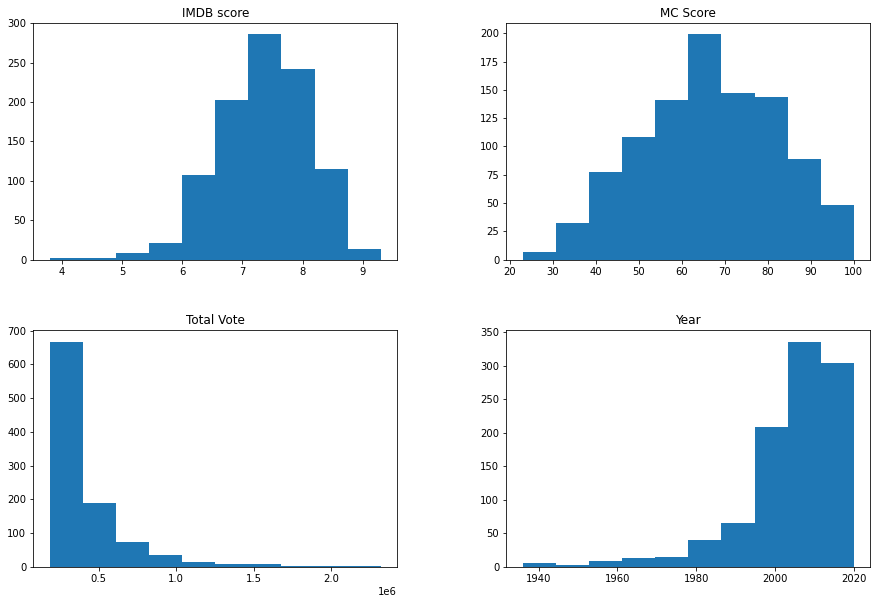

In [16]:
train.hist(bins=10,figsize=(15,10),grid= False);

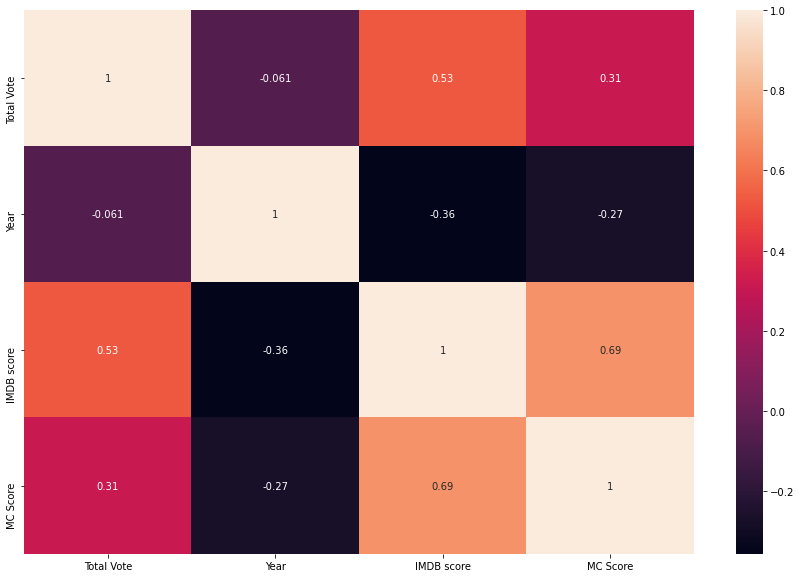

In [17]:
corr = train.corr();
plt.figure(figsize=(15,10));
ax = sns.heatmap(corr, annot=True);

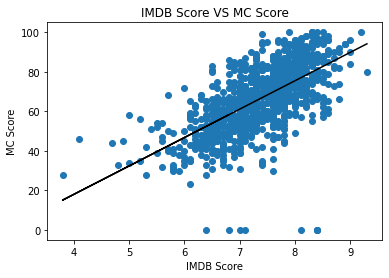

In [27]:
train['IMDB score'] = train['IMDB score'].fillna(0)
train['MC Score'] = train['MC Score'].fillna(0)
plt.scatter(train['IMDB score'], train['MC Score']);
m, b = np.polyfit(train['IMDB score'], train['MC Score'], 1);
plt.plot(train['IMDB score'], m*train['IMDB score'] + b, color = 'Black');
plt.xlabel('IMDB Score');
plt.ylabel('MC Score');
plt.title('IMDB Score VS MC Score');
plt.savefig('fig10.jpeg', dpi = 150)

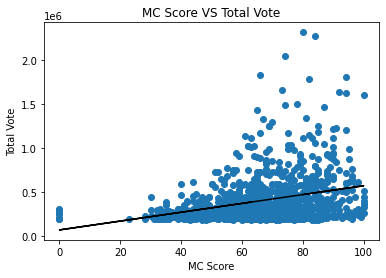

In [28]:
plt.scatter(train['MC Score'], train['Total Vote']);
m, b = np.polyfit(train['MC Score'], train['Total Vote'], 1);
plt.plot(train['MC Score'], m*train['MC Score'] + b, color = 'Black');
plt.xlabel('MC Score');
plt.ylabel('Total Vote');
plt.title('MC Score VS Total Vote');
plt.savefig('fig11.jpeg', dpi = 150)

In [18]:
train2 = pd.read_excel('new_data.xlsx', error_bad_lines=False)
train2.Genre = train.Genre.str.replace(' ', '')

In [19]:
ccxdir = []
for g in range(total):
    xdir = train.loc[(train['Director'] == dirlist[g])]
    if len(xdir['Year']) > 0:
        avgrat2 = xdir['MC Score'].sum() / len(xdir['Year'])
        ccxdir.append(avgrat2)

In [20]:
for j in range (0, len(dirlist)): 
    train2.Director = train2.Director.replace(dirlist[j], ccxdir[j])
    

In [21]:
train2
#print(ccx)

,Name,Director,Total Vote,Year,IMDB score,MC Score,Genre,Column1,_1
0,The Shawshank Redemption,66.333333,2318407,1994,9.3,80.0,Drama,NaN,NaN
1,The Dark Knight,76.700000,2280614,2008,9.0,84.0,Action,Crime,Drama
2,Inception,76.700000,2043823,2010,8.8,74.0,Action,Adventure,Sci-Fi
3,Fight Club,70.900000,1836556,1999,8.8,66.0,Drama,NaN,NaN
4,Pulp Fiction,69.000000,1808737,1994,8.9,94.0,Crime,Drama,NaN
...,...,...,...,...,...,...,...,...,...
995,Miss Congeniality,44.000000,186123,2000,6.2,43.0,Action,Comedy,Crime
996,Fracture,57.500000,185995,2007,7.2,68.0,Crime,Drama,Thriller
997,Tinker Tailor Soldier Spy,83.500000,185909,2011,7.0,85.0,Drama,Mystery,Thriller
998,The Karate Kid,65.000000,185845,1984,7.3,60.0,Action,Drama,Family


In [44]:
for j in range (0, len(genlist)): 
    train2.Genre = train2.Director.replace(dirlist[j], ccx3[j])

In [45]:
train2

,Name,Director,Total Vote,Year,IMDB score,MC Score,Genre,Column1,_1
0,The Shawshank Redemption,8.333333,2318407,1994,9.3,80.0,8.333333,NaN,NaN
1,The Dark Knight,7.576190,2280614,2008,9.0,84.0,7.576190,Crime,Drama
2,Inception,7.576190,2043823,2010,8.8,74.0,7.576190,Adventure,Sci-Fi
3,Fight Club,7.760000,1836556,1999,8.8,66.0,7.760000,NaN,NaN
4,Pulp Fiction,7.990000,1808737,1994,8.9,94.0,7.990000,Drama,NaN
...,...,...,...,...,...,...,...,...,...
995,Miss Congeniality,6.300000,186123,2000,6.2,43.0,6.300000,Comedy,Crime
996,Fracture,7.450000,185995,2007,7.2,68.0,7.450000,Drama,Thriller
997,Tinker Tailor Soldier Spy,7.450000,185909,2011,7.0,85.0,7.450000,Mystery,Thriller
998,The Karate Kid,7.700000,185845,1984,7.3,60.0,7.700000,Drama,Family


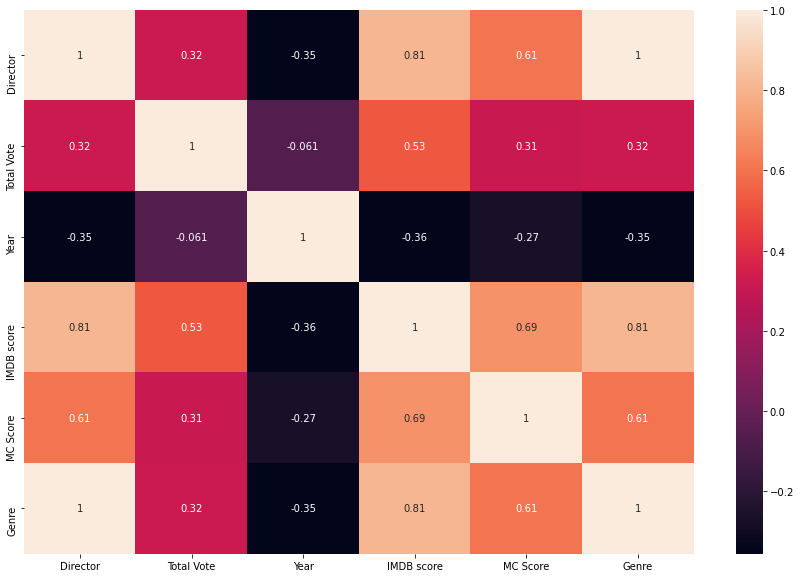

In [47]:
corr2 = train2.corr();
plt.figure(figsize=(15,10));
ax2 = sns.heatmap(corr2, annot=True);
plt.savefig('fig6.jpeg', dpi = 150)

In [67]:
train2['IMDB score'] = train2['IMDB score'].fillna(0)
train2['MC Score'] = train2['MC Score'].fillna(0)

In [69]:
A = train2.drop(['MC Score', 'Name', 'Column1', '_1', 'Genre'], axis=1)

In [70]:
b = train2['MC Score']

In [71]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.3, random_state=0)

In [72]:
linreg = LinearRegression()
linreg.fit(A_train, b_train)
b_pred = linreg.predict(A_test)

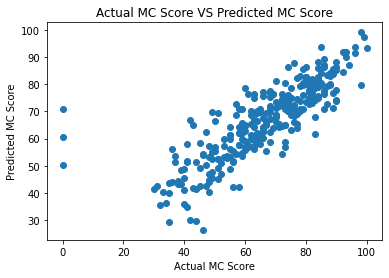

In [74]:
plt.scatter(b_test, b_pred);
plt.xlabel('Actual MC Score');
plt.ylabel('Predicted MC Score');
plt.title('Actual MC Score VS Predicted MC Score');
plt.savefig('fig12.jpeg', dpi = 150)

In [75]:
print(r2score(b_test, b_pred))

0.66772791889837


In [ ]:
C = train2.drop(['MC score', 'Name', 'Column1', '_1', 'Genre'], axis=1)

In [ ]:
d = train2['MC score']